In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
# Load data
df = pd.read_csv("canada_medical_insurance_forecast_detailed.csv")


In [5]:
# -----------------------------
# 1. BASIC DATA INSPECTION
# -----------------------------
print("HEAD:")
display(df.head())

print("\nINFO:")
print(df.info())

print("\nDESCRIPTIVE STATISTICS:")
display(df.describe(include='all'))

HEAD:


,claim_id,date,year,month,quarter,member_id,first_name,last_name,age,sex,...,chronic_condition,risk_score,monthly_premium_cad,claim_amount_cad,is_high_cost_claim,is_forecast,forecast_lower_bound_cad,forecast_upper_bound_cad,loss_ratio,age_group
0,C00000001,2024-01-01,2024,1,1,M000379,Justin,Miller,57,Male,...,COPD,2.08,202.4,309.20,False,0,NaN,NaN,1.527668,50-64
1,C00000002,2024-01-01,2024,1,1,M014269,Nancy,Harris,61,Female,...,NaN,1.30,231.0,303.67,False,0,NaN,NaN,1.314589,50-64
2,C00000003,2024-01-01,2024,1,1,M004159,Olivia,Baker,36,Female,...,NaN,1.17,78.2,52.17,False,0,NaN,NaN,0.667136,35-49
3,C00000004,2024-01-01,2024,1,1,M006358,John,Morgan,18,Male,...,NaN,0.99,165.6,150.68,False,0,NaN,NaN,0.909903,18-34
4,C00000005,2024-01-01,2024,1,1,M006358,John,Morgan,18,Male,...,NaN,0.99,202.4,176.88,False,0,NaN,NaN,0.873913,18-34



INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528600 entries, 0 to 528599
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   claim_id                  528600 non-null  object 
 1   date                      528600 non-null  object 
 2   year                      528600 non-null  int64  
 3   month                     528600 non-null  int64  
 4   quarter                   528600 non-null  int64  
 5   member_id                 528600 non-null  object 
 6   first_name                528600 non-null  object 
 7   last_name                 528600 non-null  object 
 8   age                       528600 non-null  int64  
 9   sex                       528600 non-null  object 
 10  province                  528600 non-null  object 
 11  employer_size             528600 non-null  object 
 12  plan_type                 528600 non-null  object 
 13  chronic_condition         196220 non-

,claim_id,date,year,month,quarter,member_id,first_name,last_name,age,sex,...,chronic_condition,risk_score,monthly_premium_cad,claim_amount_cad,is_high_cost_claim,is_forecast,forecast_lower_bound_cad,forecast_upper_bound_cad,loss_ratio,age_group
count,528600,528600,528600.000000,528600.000000,528600.000000,528600,528600,528600,528600.000000,528600,...,196220,528600.000000,528600.000000,528600.000000,528600,528600.000000,160788.000000,160788.000000,528600.000000,528600
unique,528600,36,NaN,NaN,NaN,14999,60,60,NaN,2,...,9,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,4
top,C00528600,2026-02-19,NaN,NaN,NaN,M000158,Grace,Evans,NaN,Female,...,Hypertension,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,18-34
freq,1,15663,NaN,NaN,NaN,67,10419,10379,NaN,273389,...,22770,NaN,NaN,NaN,523012,NaN,NaN,NaN,NaN,224442
mean,NaN,NaN,2024.942283,6.178297,2.400034,NaN,NaN,NaN,39.483426,NaN,...,NaN,1.314405,199.008564,304.907096,NaN,0.304177,282.589261,382.326552,1.530852,NaN
std,NaN,NaN,0.814089,3.471162,1.132891,NaN,NaN,NaN,13.954380,NaN,...,NaN,0.353540,84.190581,194.129345,NaN,0.460058,179.897662,243.390967,0.748711,NaN
min,NaN,NaN,2024.000000,1.000000,1.000000,NaN,NaN,NaN,18.000000,NaN,...,NaN,0.900000,32.200000,14.680000,NaN,0.000000,14.550000,19.690000,0.450445,NaN
25%,NaN,NaN,2024.000000,3.000000,1.000000,NaN,NaN,NaN,27.000000,NaN,...,NaN,1.030000,114.110000,154.600000,NaN,0.000000,142.540000,192.850000,1.018884,NaN
50%,NaN,NaN,2025.000000,6.000000,2.000000,NaN,NaN,NaN,38.000000,NaN,...,NaN,1.170000,225.000000,271.560000,NaN,0.000000,251.825000,340.705000,1.421591,NaN
75%,NaN,NaN,2026.000000,9.000000,3.000000,NaN,NaN,NaN,51.000000,NaN,...,NaN,1.570000,258.720000,415.170000,NaN,1.000000,384.810000,520.630000,1.856349,NaN



MISSING VALUES:


forecast_lower_bound_cad    367812
forecast_upper_bound_cad    367812
chronic_condition           332380
month                            0
claim_id                         0
date                             0
year                             0
first_name                       0
member_id                        0
quarter                          0
last_name                        0
province                         0
employer_size                    0
sex                              0
age                              0
risk_score                       0
plan_type                        0
monthly_premium_cad              0
claim_amount_cad                 0
is_forecast                      0
is_high_cost_claim               0
loss_ratio                       0
age_group                        0
dtype: int64

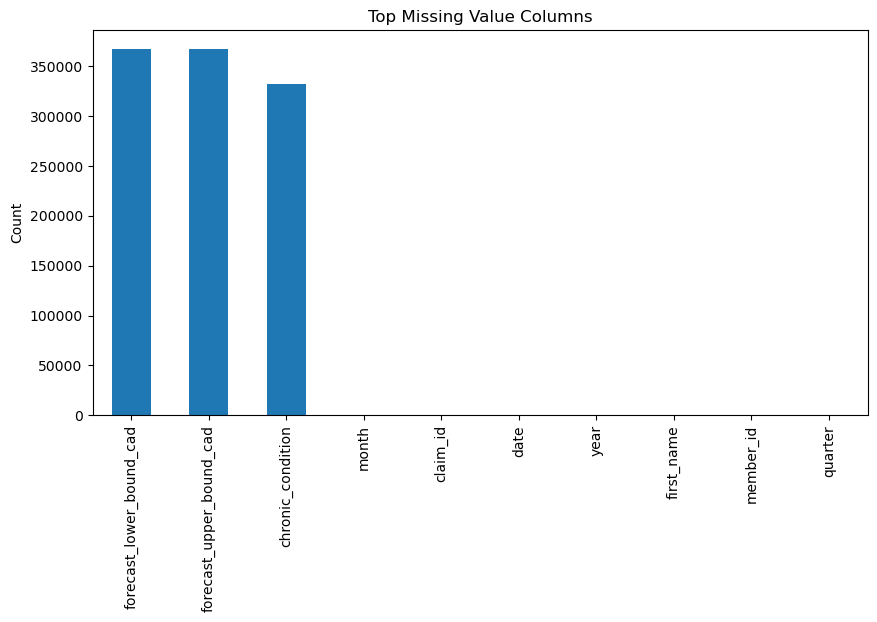

In [6]:
# -----------------------------
# 2. MISSING VALUE ANALYSIS
# -----------------------------
print("\nMISSING VALUES:")
missing_vals = df.isnull().sum().sort_values(ascending=False)
display(missing_vals)

# Missing values % plot
plt.figure(figsize=(10,5))
missing_vals.head(10).plot(kind='bar')
plt.title("Top Missing Value Columns")
plt.ylabel("Count")
plt.show()


VALUE COUNTS FOR SEX:


sex
Female    273389
Male      255211
Name: count, dtype: int64

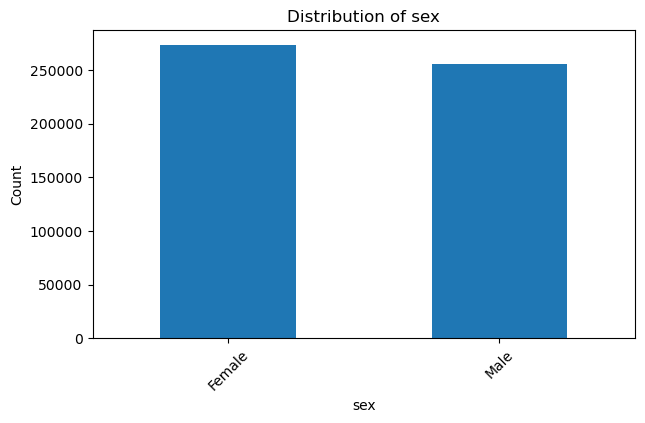


VALUE COUNTS FOR PROVINCE:


province
Ontario                      196631
Quebec                       125750
British Columbia              70250
Alberta                       59072
Manitoba                      20188
Nova Scotia                   16127
Saskatchewan                  15398
New Brunswick                 10775
Newfoundland and Labrador      9437
Prince Edward Island           4972
Name: count, dtype: int64

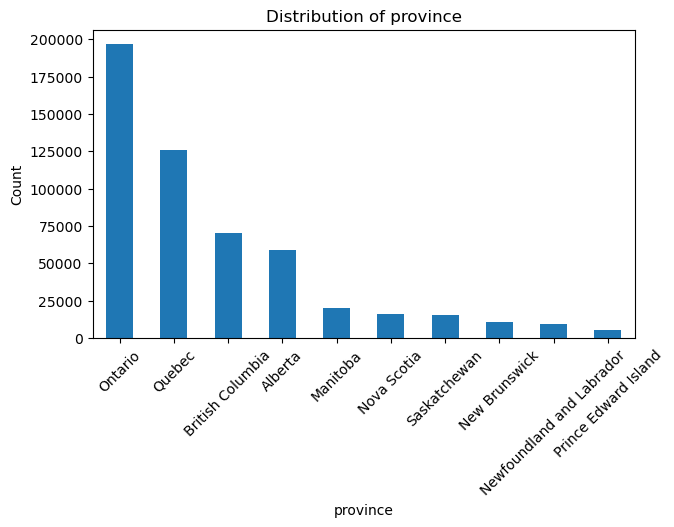


VALUE COUNTS FOR EMPLOYER_SIZE:


employer_size
Medium (50-500)    192257
Large (500+)       189439
Small (<50)        135396
Individual          11508
Name: count, dtype: int64

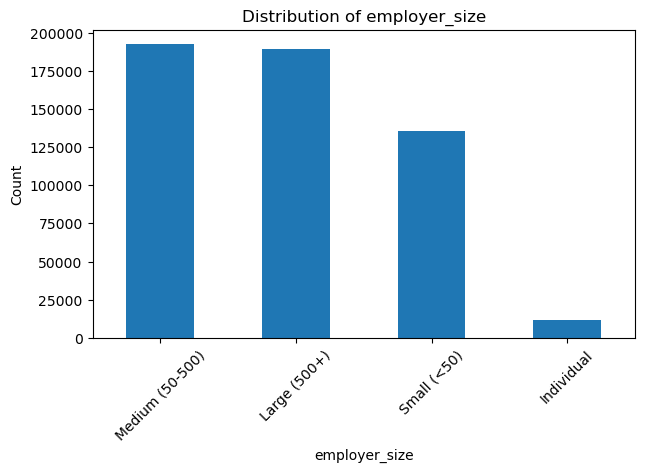


VALUE COUNTS FOR PLAN_TYPE:


plan_type
Prescription Drug       282442
Extended Health          94149
Dental                   86828
Vision Care              37954
Mental Health            21529
Disability Insurance      5698
Name: count, dtype: int64

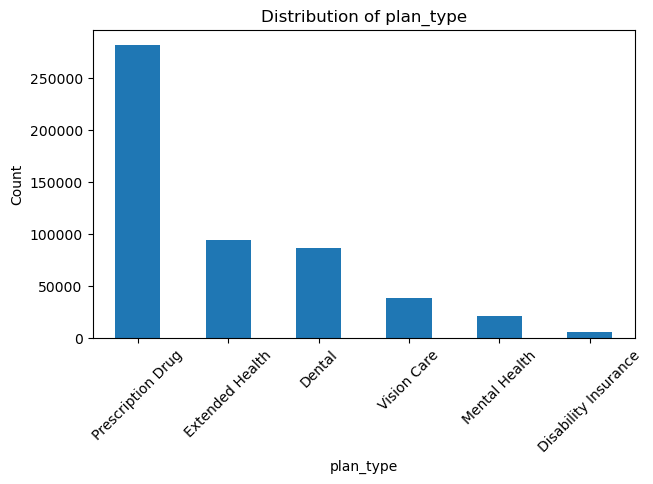


VALUE COUNTS FOR AGE_GROUP:


age_group
18-34    224442
35-49    158879
50-64    126362
65+       18917
Name: count, dtype: int64

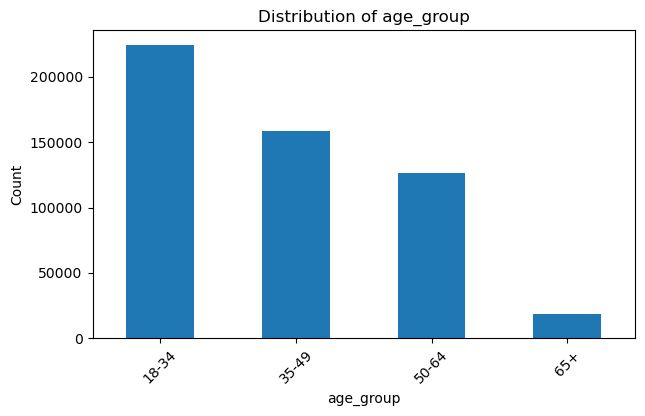


VALUE COUNTS FOR CHRONIC_CONDITION:


chronic_condition
Hypertension       22770
Asthma             22450
Anxiety            22362
Diabetes Type 1    21924
Depression         21906
Diabetes Type 2    21559
Arthritis          21367
COPD               21099
Heart Disease      20783
Name: count, dtype: int64

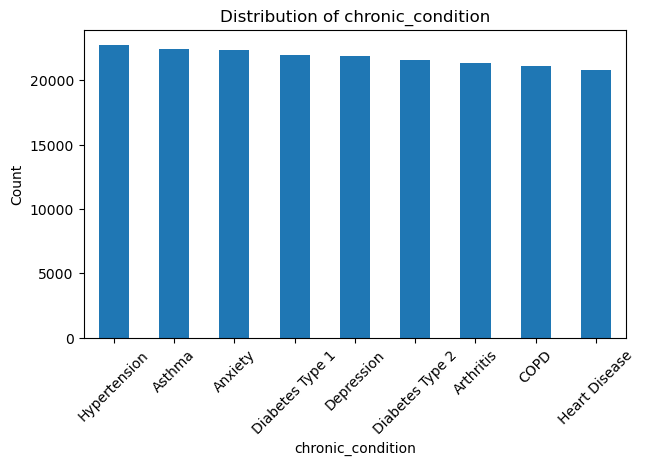

In [7]:
# -----------------------------
# 3. CATEGORICAL VARIABLE ANALYSIS
# -----------------------------
categorical_cols = ['sex','province','employer_size','plan_type','age_group','chronic_condition']

for col in categorical_cols:
    print(f"\nVALUE COUNTS FOR {col.upper()}:")
    display(df[col].value_counts())

    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()

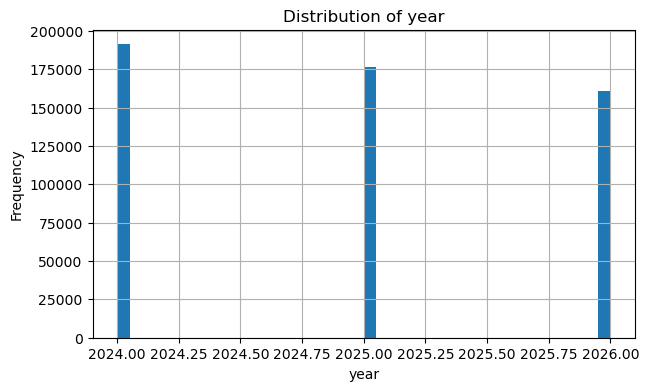

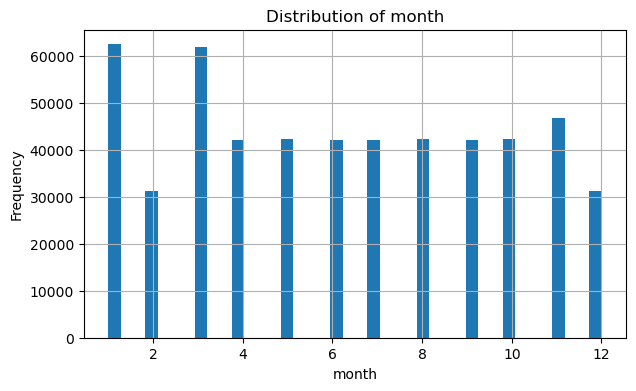

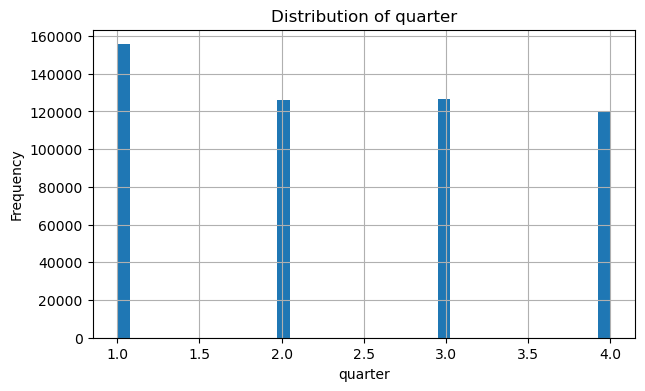

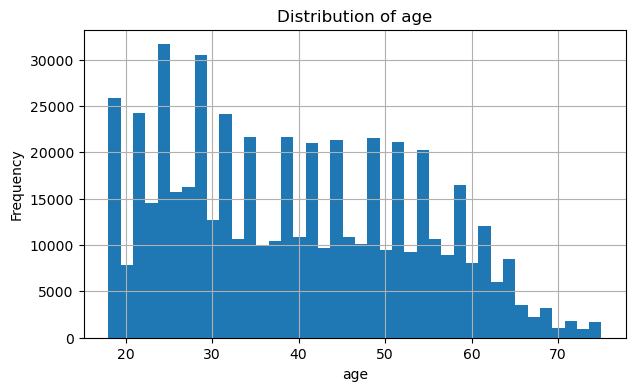

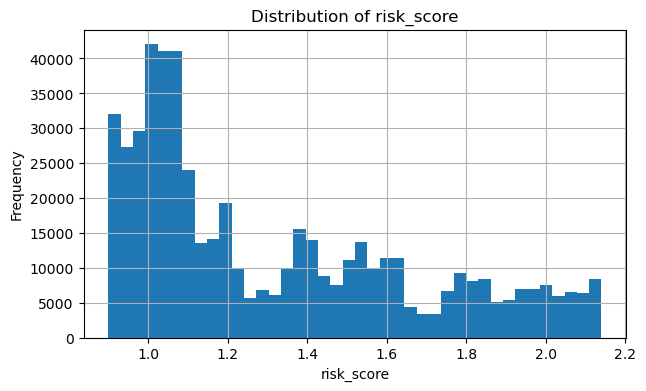

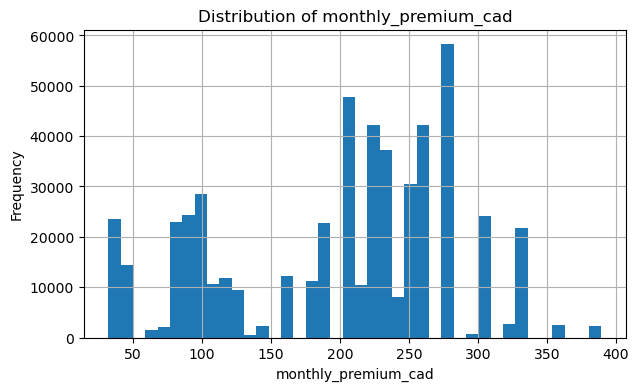

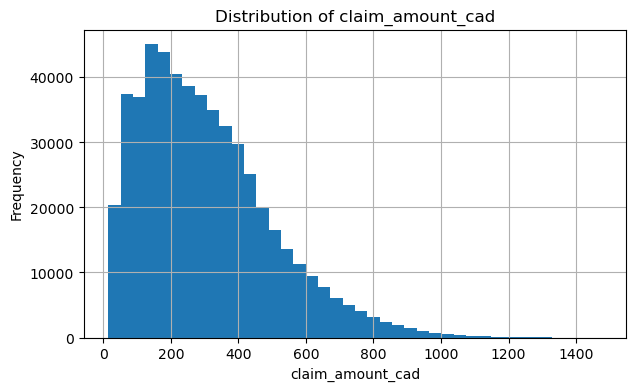

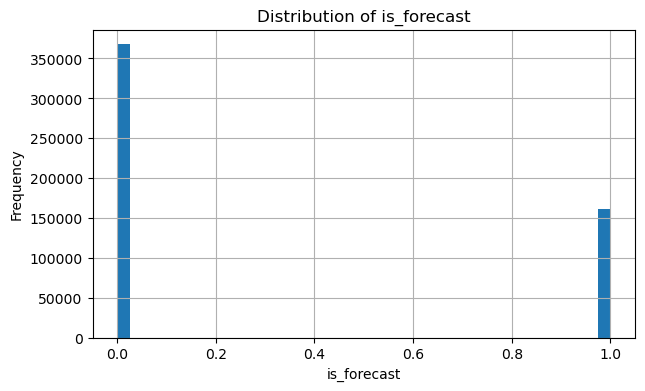

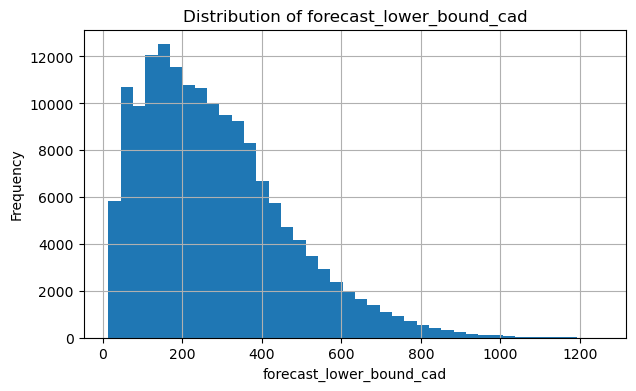

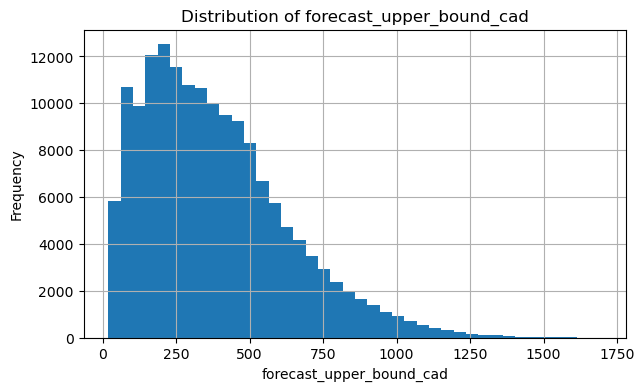

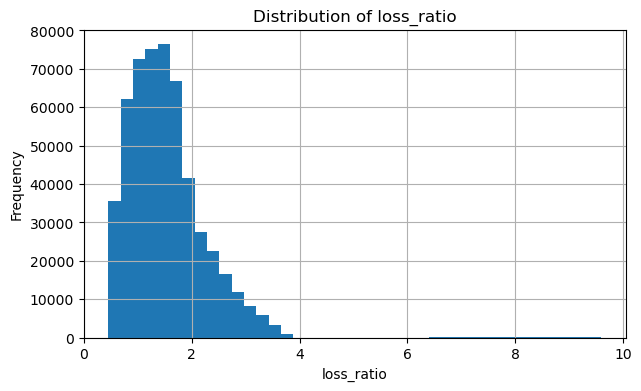

In [8]:
# -----------------------------
# 4. NUMERICAL DISTRIBUTIONS
# -----------------------------
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(7,4))
    df[col].hist(bins=40)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

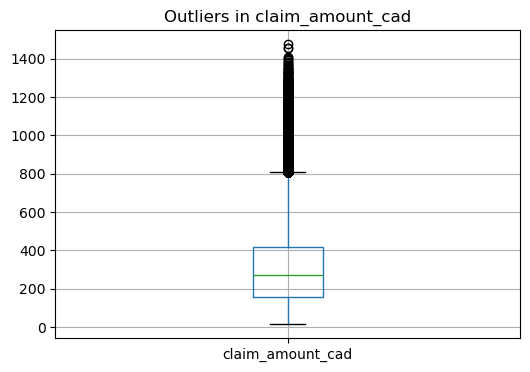

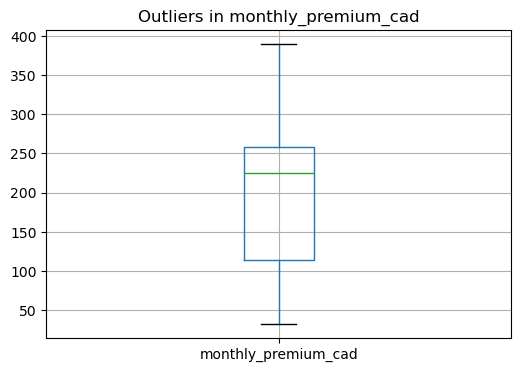

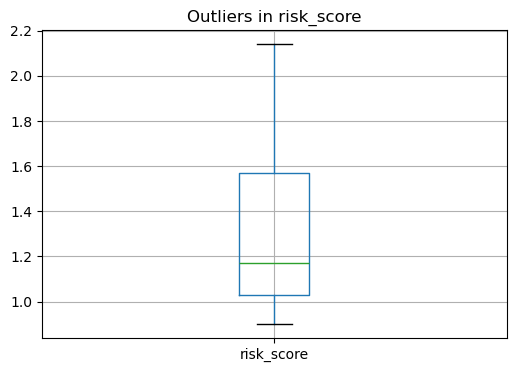

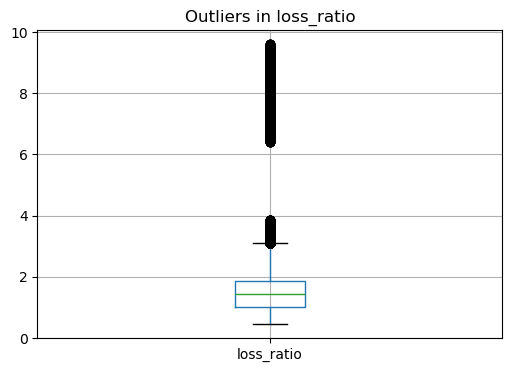

In [9]:
# -----------------------------
# 5. OUTLIER ANALYSIS
# -----------------------------
outlier_cols = ['claim_amount_cad','monthly_premium_cad','risk_score','loss_ratio']

for col in outlier_cols:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col)
    plt.title(f"Outliers in {col}")
    plt.show()

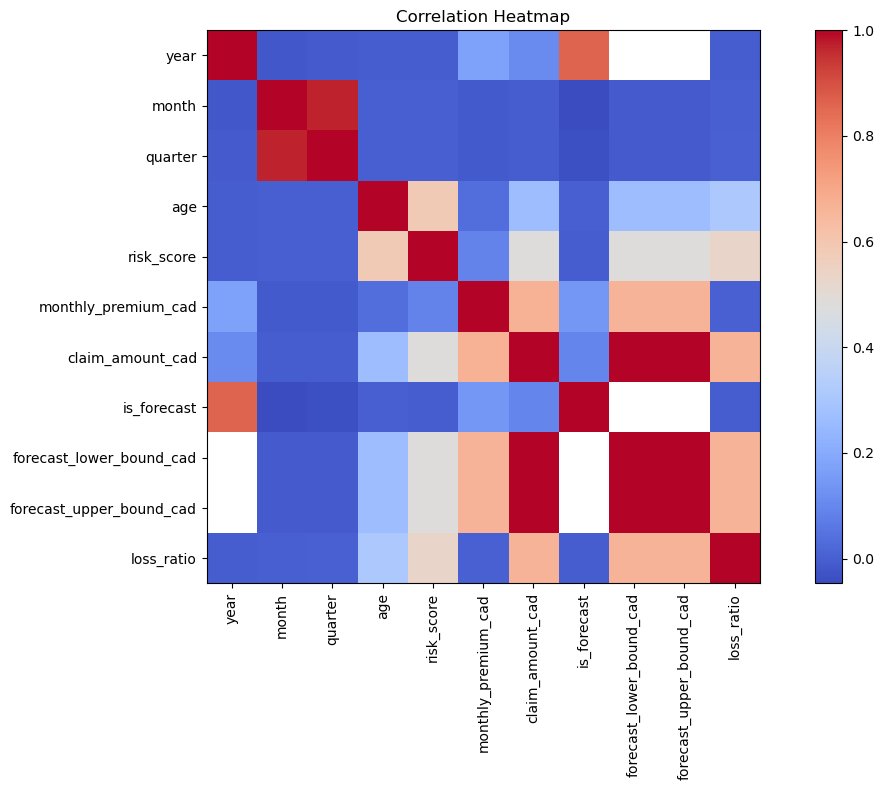

In [13]:
# -----------------------------
# 6. CORRELATION ANALYSIS
# -----------------------------
plt.figure(figsize=(12,8))
corr = df[numeric_cols].corr()
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.title("Correlation Heatmap")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.tight_layout()
plt.show()

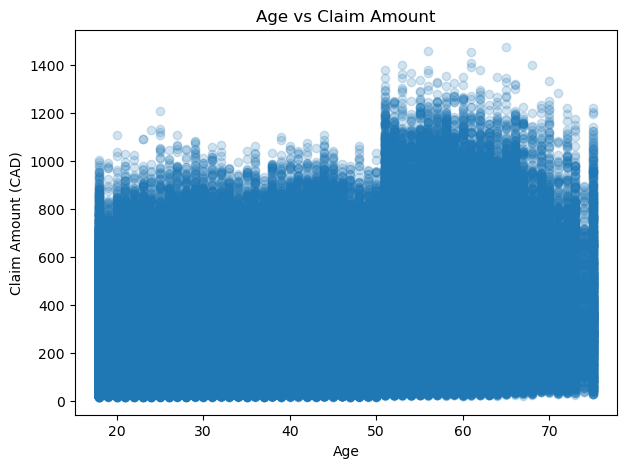

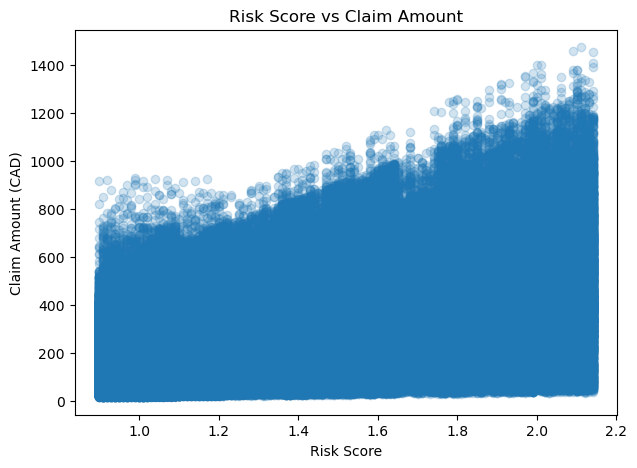

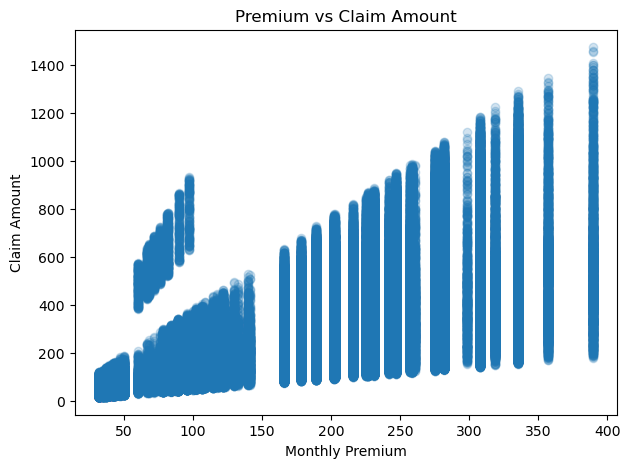

In [14]:
# -----------------------------
# 7. RELATIONSHIP ANALYSIS
# -----------------------------
plt.figure(figsize=(7,5))
plt.scatter(df['age'], df['claim_amount_cad'], alpha=0.2)
plt.title("Age vs Claim Amount")
plt.xlabel("Age")
plt.ylabel("Claim Amount (CAD)")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df['risk_score'], df['claim_amount_cad'], alpha=0.2)
plt.title("Risk Score vs Claim Amount")
plt.xlabel("Risk Score")
plt.ylabel("Claim Amount (CAD)")
plt.show()

plt.figure(figsize=(7,5))
plt.scatter(df['monthly_premium_cad'], df['claim_amount_cad'], alpha=0.2)
plt.title("Premium vs Claim Amount")
plt.xlabel("Monthly Premium")
plt.ylabel("Claim Amount")
plt.show()

In [15]:
# -----------------------------
# 8. FORECAST VS ACTUAL ANALYSIS
# -----------------------------
print("\nFORECAST FLAG COUNTS:")
display(df['is_forecast'].value_counts())

actual_df = df[df['is_forecast'] == 0]
forecast_df = df[df['is_forecast'] == 1]

print("\nACTUAL ROWS:", len(actual_df))
print("FORECAST ROWS:", len(forecast_df))



FORECAST FLAG COUNTS:


is_forecast
0    367812
1    160788
Name: count, dtype: int64


ACTUAL ROWS: 367812
FORECAST ROWS: 160788


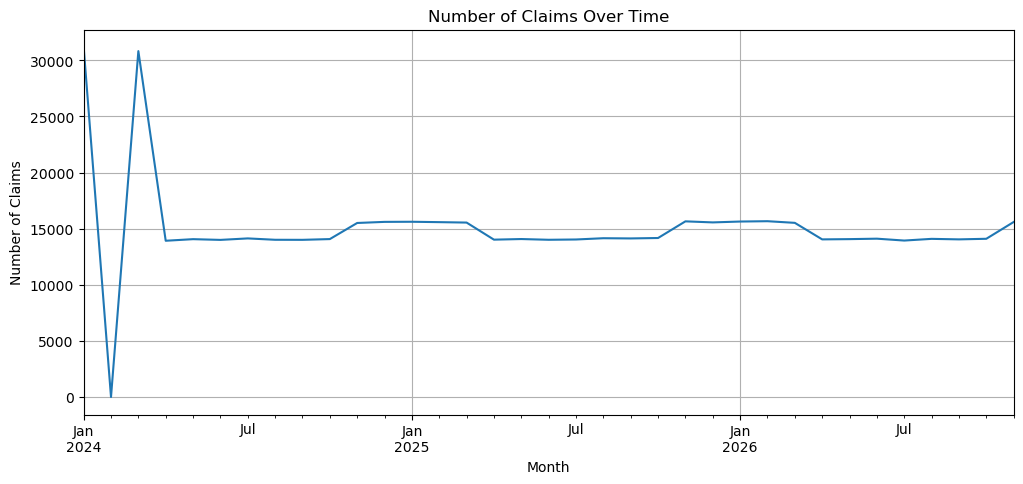

In [16]:
# -----------------------------
# 9. TIME-SERIES ANALYSIS
# -----------------------------
df['date'] = pd.to_datetime(df['date'])

monthly_counts = df.set_index('date').resample('ME').size()

plt.figure(figsize=(12,5))
monthly_counts.plot()
plt.title("Number of Claims Over Time")
plt.xlabel("Month")
plt.ylabel("Number of Claims")
plt.grid(True)
plt.show()

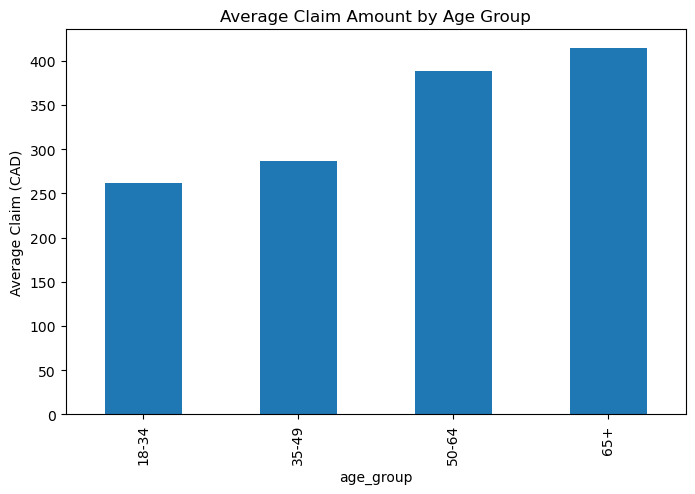

In [17]:
# -----------------------------
# 10. CLAIM AMOUNT BY AGE GROUP
# -----------------------------
plt.figure(figsize=(8,5))
df.groupby("age_group")['claim_amount_cad'].mean().plot(kind='bar')
plt.title("Average Claim Amount by Age Group")
plt.ylabel("Average Claim (CAD)")
plt.show()

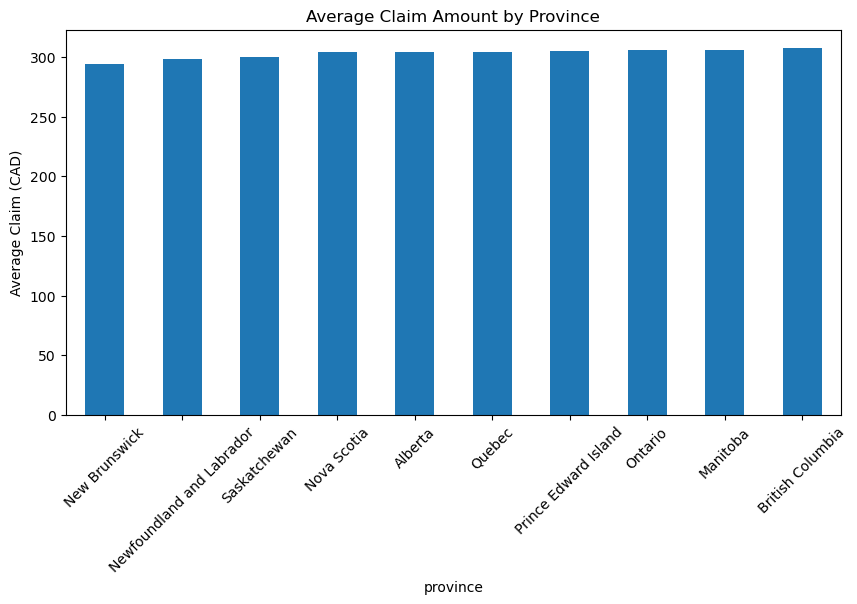

In [18]:
# -----------------------------
# 11. CLAIMS BY PROVINCE
# -----------------------------
plt.figure(figsize=(10,5))
df.groupby("province")['claim_amount_cad'].mean().sort_values().plot(kind='bar')
plt.title("Average Claim Amount by Province")
plt.ylabel("Average Claim (CAD)")
plt.xticks(rotation=45)
plt.show()